In [105]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import math



# split the dataset into training and testing set
keibaData = pd.read_csv("201911.csv",sep=",")
kD= pd.read_csv("201911.csv",sep=",")
keibaData=wind_dire(keibaData)
X = keibaData.drop(columns='着順').drop(columns='馬名').drop(columns='性齢').drop(columns='騎手').drop(columns='調教師').drop(columns='日時').drop(columns='風向')
keibaData.loc[keibaData['着順'] != 1, '着順'] = 0

y = keibaData['着順']

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=None)

# Create linear regression object
regr = LogisticRegression()

# Train the model using the training set
regr.fit(X_train, y_train)

# Make predictions using the testing set
predicted = regr.predict(X_test)

# Check accuracy
print(accuracy_score(y_test, predicted))

y_pred=regr.predict(X_test)
#plt.rcParams['figure.figsize'] = (10.0, 10.0)
mat = confusion_matrix(y_test, regr.predict(X_test))
print(mat)
#print(keibaData.columns.values)
print('Precision: %.5f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.5f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.5f' % f1_score(y_true=y_test, y_pred=y_pred))


     枠  馬番  負担重量  推定上り  馬体重  増減  単勝人気  降水量    気温   風速  レース    距離
0    2   2    55  36.8  500  -2     2  0.0  15.5  1.8    1  1600
1    6   6    52  37.0  500   8     1  0.0  15.5  1.8    1  1600
2    8  10    55  37.4  446   2     5  0.0  15.5  1.8    1  1600
3    4   4    52  37.3  470   4     3  0.0  15.5  1.8    1  1600
4    1   1    54  37.3  496  -2     4  0.0  15.5  1.8    1  1600
..  ..  ..   ...   ...  ...  ..   ...  ...   ...  ...  ...   ...
698  3   3    55  35.8  462  -6     5  0.0  20.4  1.7    7  1600
699  2   2    55  36.0  488   8     6  0.0  20.4  1.7    7  1600
700  5   5    55  36.9  478   6     3  0.0  20.4  1.7    7  1600
701  7   7    55  37.8  532   6     4  0.0  20.4  1.7    7  1600
702  4   4    55  37.3  442   2     7  0.0  20.4  1.7    7  1600

[703 rows x 12 columns]
0.9154929577464789
[[63  0]
 [ 6  2]]
Precision: 1.00000
Recall: 0.25000
F1: 0.40000


/Users/e175755/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
def wind_dire(df):
    df=df.replace(['東'],math.cos(math.radians(0)))
    df=df.replace(['東北東'],math.cos(math.radians(22.5)))
    df=df.replace(['北東'],math.cos(math.radians(45)))
    df=df.replace(['北北東'],math.cos(math.radians(67.5)))
    df=df.replace(['北'],math.cos(math.radians(90)))
    df=df.replace(['北北西'],math.cos(math.radians(112.5)))
    df=df.replace(['北西'],math.cos(math.radians(135)))
    df=df.replace(['西北西'],math.cos(math.radians(157.5)))
    df=df.replace(['西'],math.cos(math.radians(180)))
    df=df.replace(['西南西'],math.cos(math.radians(202.5)))
    df=df.replace(['南西'],math.cos(math.radians(225)))
    df=df.replace(['南南西'],math.cos(math.radians(247.5)))
    df=df.replace(['南'],math.cos(math.radians(270)))
    df=df.replace(['南南東'],math.cos(math.radians(292.5)))
    df=df.replace(['南東'],math.cos(math.radians(315)))
    df=df.replace(['東南東'],math.cos(math.radians(337.5)))
    #df.replace([0,1,'a'],-99)
#     df=df.loc[keibaData['風向'] == '東北東', '風向'] = math.cos(math.radians(22.5))
#     df=df.loc[keibaData['風向'] == '北東', '風向'] = math.cos(math.radians(45))
#     df=df.loc[keibaData['風向'] == '北北東', '風向'] = math.cos(math.radians(67.5))
#     df=df.loc[keibaData['風向'] == '北', '風向'] = math.cos(math.radians(90))
#     df=df.loc[keibaData['風向'] == '北北西', '風向'] = math.cos(math.radians(112.5))
#     df=df.loc[keibaData['風向'] == '北西', '風向'] = math.cos(math.radians(135))
#     df=df.loc[keibaData['風向'] == '西北西', '風向'] = math.cos(math.radians(157.5))
#     df=df.loc[keibaData['風向'] == '西', '風向'] = math.cos(math.radians(180))
#     df=df.loc[keibaData['風向'] == '西南西', '風向'] = math.cos(math.radians(200.5))
#     df=df.loc[keibaData['風向'] == '南西', '風向'] = math.cos(math.radians(225))
#     df=df.loc[keibaData['風向'] == '南南西', '風向'] = math.cos(math.radians(247.5))
#     df=df.loc[keibaData['風向'] == '南', '風向'] = math.cos(math.radians(270))
#     df=df.loc[keibaData['風向'] == '南南東', '風向'] = math.cos(math.radians(292.5))
#     df=df.loc[keibaData['風向'] == '南東', '風向'] = math.cos(math.radians(310))
#     df=df.loc[keibaData['風向'] == '東南東', '風向'] = math.cos(math.radians(332.5))
    return df

In [106]:
kD

,着順,枠,馬番,馬名,性齢,負担重量,騎手,推定上り,馬体重,増減,調教師,単勝人気,降水量,気温,風速,風向,レース,距離,日時
0,1,2,2,アナンダライト,牡2,55,C.ルメール,36.8,500,-2,田村 康仁,2,0.0,15.5,1.8,北北東,1,1600,2019/11/2
1,2,6,6,ファイブリーフ,牡2,52,▲藤田 菜七子,37.0,500,8,岩戸 孝樹,1,0.0,15.5,1.8,北北東,1,1600,2019/11/2
2,3,8,10,アナザーチャンス,牡2,55,江田 照男,37.4,446,2,小笠 倫弘,5,0.0,15.5,1.8,北北東,1,1600,2019/11/2
3,4,4,4,リュウノチョッパー,牡2,52,▲山田 敬士,37.3,470,4,伊藤 伸一,3,0.0,15.5,1.8,北北東,1,1600,2019/11/2
4,5,1,1,エバンタイユドール,牝2,54,武士沢 友治,37.3,496,-2,高市 圭二,4,0.0,15.5,1.8,北北東,1,1600,2019/11/2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,3,3,3,アオイクレアトール,牡2,55,武 豊,35.8,462,-6,古賀 慎明,5,0.0,20.4,1.7,北北東,7,1600,2019/11/24
699,4,2,2,ワンスカイ,牡2,55,W.ビュイック,36.0,488,8,斎藤 誠,6,0.0,20.4,1.7,北北東,7,1600,2019/11/24
700,5,5,5,レッドライデン,牡2,55,O.マーフィー,36.9,478,6,鹿戸 雄一,3,0.0,20.4,1.7,北北東,7,1600,2019/11/24
701,6,7,7,ラッシュアップ,牡2,55,L.デットーリ,37.8,532,6,金成 貴史,4,0.0,20.4,1.7,北北東,7,1600,2019/11/24


In [66]:
print(keibaData.columns.values)

['着順' '枠' '馬番' '馬名' '性齢' '負担重量' '騎手' '推定上り' '馬体重' '増減' '調教師' '単勝人気' '降水量'
 '気温' '風速' '風向' 'レース' '距離' '日時']


In [72]:
df=keibaData.loc[:,['着順','枠','馬番','負担重量','推定上り','馬体重','増減','単勝人気','降水量','気温','風速','風向','レース','距離']]

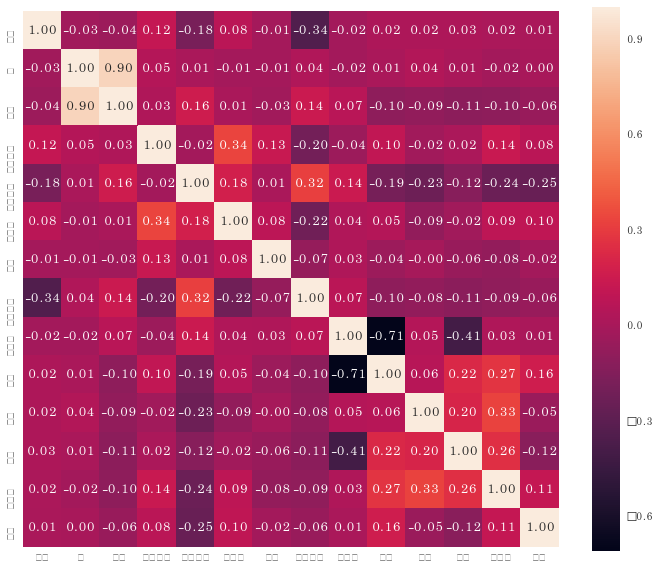

In [92]:
#相関行列
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#size_mapping = {'navigation': 0, 'canceled': 1}
#df['着順'] = df['着順'].map(size_mapping)

cols = ['着順','枠','馬番','負担重量','推定上り','馬体重','増減','単勝人気','降水量','気温','風速','風向','レース','距離']

cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
plt.subplots(figsize = (12,10))
sns.set(font='AppleMyungjo')
#sns.set()
sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 13},
                 yticklabels=cols,
                 xticklabels=cols)

#plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
#plt.show()
#df.head()

In [86]:
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print(font_names)

['Trattatello', 'DIN Alternate', 'Serto Mardin', 'Serto Batnan', 'Luxi Serif', 'Times New Roman', 'System Font', 'Tahoma', 'Verdana', '.SF Compact Text', 'Serto Urhoy', 'Zapf Dingbats', 'STIXIntegralsUpSm', 'Bitstream Vera Serif', 'Bitstream Vera Sans Mono', '.SF NS Display Condensed', 'Luxi Serif', 'Luxi Sans', '.SF Compact Rounded', 'Courier New', 'STIXGeneral', '.SF NS Display Condensed', 'Estrangelo Antioch', 'Chalkduster', 'Khmer Sangam MN', 'STIXIntegralsSm', 'System Font', '.SF Compact Rounded', 'STIXGeneral', 'Times New Roman', 'Georgia', 'Luxi Mono', 'Brush Script MT', 'Estrangelo Nisibin', 'Impact', '.SF Compact Rounded', 'Hoefler Text', 'Luxi Mono', 'Serto Urhoy', 'Times New Roman', 'Mishafi Gold', '.SF NS Symbols', '.SF Compact Text', 'Luxi Serif', 'System Font', 'Estrangelo TurAbdin', '.SF Compact Rounded', 'Estrangelo Nisibin Outline', '.SF NS Symbols', 'Bitstream Vera Sans Mono', 'Goha-Tibeb Zemen', 'System Font', 'East Syriac Ctesiphon', 'Wingdings 2', '.SF NS Text Cond

In [103]:
print("北",math.sin(math.radians(90)))
print("東",math.cos(math.radians(0)))
print("南",math.sin(math.radians(270)))
print("にし",math.cos(math.radians(180)))

北 1.0
東 1.0
南 -1.0
にし -1.0
